

# Analyzing IMDb Data

---

The csv data can be downloaded from https://drive.google.com/open?id=12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l for your offline use purpose

## Part 1

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 18.0MB/s 


In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'12oQVUx8gGsdruEi4iJB-KFvxLt3znK-l'}) # replace the id with id of file you want to access
downloaded.GetContentFile('imdb_1000.csv') 

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [0]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [0]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [0]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [0]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [0]:
# Answer:
print('shortest movie:',sorted(movies['duration'])[0])
print('longest movie:',sorted(movies['duration'])[-1])

shortest movie: 64
longest movie: 242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0, 0.5, 'frequency')

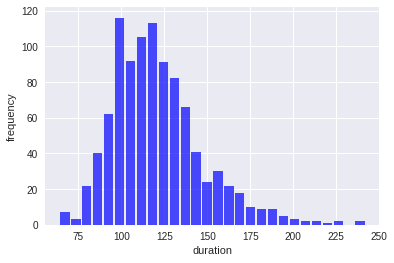

In [0]:
# Answer:
n, bins, patches = plt.hist(x=movies['duration'], bins='auto', color='blue',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('duration')
plt.ylabel('frequency')

#### Use a box plot to display that same data.

{'boxes': [<matplotlib.lines.Line2D at 0x7f1149ecf278>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1149ecfb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1149e5a5c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1149e5a240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1149ecf400>,
  <matplotlib.lines.Line2D at 0x7f1149ecf780>]}

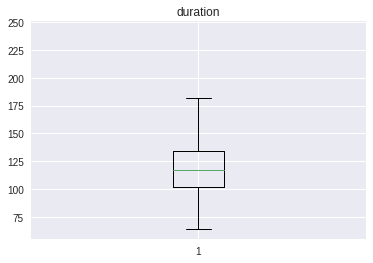

In [0]:
# Answer:
fig1, ax1 = plt.subplots()
ax1.set_title('duration')
ax1.boxplot(movies['duration'])

## Part 2

#### Count how many movies have each of the content ratings.

In [0]:
# Answer:
movies.content_rating.value_counts()


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Content Rating Distribution')

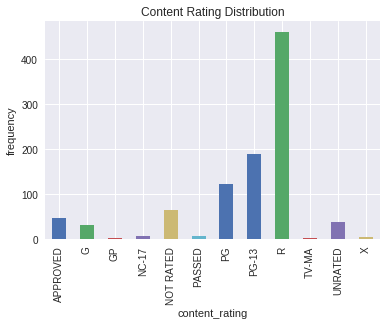

In [0]:
# Answer:
df=movies.groupby(['content_rating']).size()
df.plot(kind='bar')


plt.ylabel('frequency')
plt.title('Content Rating Distribution')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [0]:
# Answer:
movies['content_rating'].replace({'NOT RATED':'UNRATED', 'APPROVED':'UNRATED','PASSED':'UNRATED','GP':'UNRATED'},inplace=True)
movies['content_rating']

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [0]:
# Answer:
movies['content_rating'].replace({'X':'NC-17', 'TV-MA':'NC-17'},inplace=True)
movies['content_rating']

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Count the number of missing values in each column.

In [0]:
# Answer:
movies.isnull().sum()


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [0]:
# Answer:

movies['content_rating'].fillna('UNRATED',inplace=True)
movies.isnull().sum()


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [0]:
# Answer:

print(movies[movies['duration'] >= 120]['star_rating'].mean())
print(movies[movies['duration'] < 120]['star_rating'].mean())

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

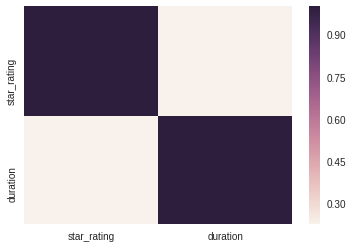

In [0]:
# Answer:
import seaborn as sns
sns.heatmap(movies.corr().abs());

#### Calculate the average duration for each genre.

In [0]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Part 3

#### Visualize the relationship between content rating and duration.

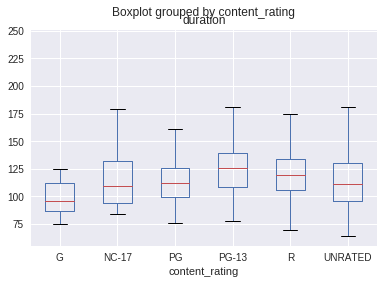

In [0]:
# Answer:
movies.boxplot(column='duration', by='content_rating')


#### Determine the top rated movie (by star rating) for each genre.

In [0]:
# Answer:
movies.groupby('genre')['title'].first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [0]:
# Answer:
result = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
result.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [0]:
# Answer:
movies.genre.value_counts()
Genres=['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [0]:
# Answer:
Genres = movies['genre'].value_counts()[movies['genre'].value_counts() >= 10].index
movies[movies['genre'].isin(Genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [0]:
# Answer:
movies.groupby('genre')['star_rating'].mean()[movies['genre'].value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [0]:
# Answer:
res = movies.groupby('genre')['star_rating'].agg(['count', 'mean'])
res[res['count'] >= 10]


,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


#### Figure out something "interesting" using the actors data!

# 1.The top five actors/actress of acting most movies

In [0]:


# 1.The top five actors/actress of acting most movies

def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]
    
movies_series = movies['actors_list'].apply(repp)
#declare a list to store the split values
actors_list = []
for actors in movies_series:
    actors_list.append([e.strip() for e in actors.split(',')])
#declare a dictionary and see if the actor name key exist and then count accordingly.
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

TOP5_Frenquency_Actors=sorted(actor_dict.items(), key=lambda kv: kv[1],reverse=True)[:5]
TOP5_Frenquency_Actors

[('Robert De Niro', 18),
 ('Clint Eastwood', 14),
 ('Brad Pitt', 14),
 ('Tom Hanks', 14),
 ('Al Pacino', 13)]

# 2.The top five actors/actress with the highest average rates(act at least 3 movies)

In [0]:
# 2.The top five actors/actress with the highest average rates(act at least 3 movies)

ratings=movies['star_rating'].tolist()
actor_rate=list(zip(actors_list,ratings))      # get a list of tuples of actors in the same movie and rate
                                               # like [(['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'], 9.3)]
res={}    

for i in actor_dict.keys():                    # conut the average rate of the actors who have acted at least 3 movies
  scores=0
  cnt=0
  for k,v in actor_rate:
    if i in k:
      scores=scores+v
      cnt=cnt+1
  if cnt<=3:
    continue
  else:
    res[i]=scores/cnt

TOP5_Rating_Actors=sorted(res.items(), key=lambda kv: kv[1],reverse=True)[:5]
TOP5_Rating_Actors

[('Marlon Brando', 8.525),
 ('Charles Chaplin', 8.48),
 ('Aamir Khan', 8.4),
 ('Carrie Fisher', 8.375),
 ('Elijah Wood', 8.3)]

# 3.The top five actors/actress of acting most R and NC-17 movies(NC-17 is defined as unrated)

In [0]:
content_rating=movies['content_rating'].tolist()
actor_content_rate=list(zip(actors_list,content_rating))
R_actor={}

for i in actor_dict.keys():                    

  cnt=0
  for k,v in actor_content_rate:
    if i in k:
      if v=='R':
        cnt=cnt+1
  
  R_actor[i]=cnt

TOP5_R_Actors=sorted(R_actor.items(), key=lambda kv: kv[1],reverse=True)[:5]
TOP5_R_Actors

[('Robert De Niro', 15),
 ('Al Pacino', 13),
 ('Brad Pitt', 11),
 ('Johnny Depp', 8),
 ('Ethan Hawke', 7)]

# 4. Golden Partners

In [0]:
import itertools

combinations=[]

for i in actors_list:
  
  actor_combo=itertools.combinations(i,3)   # find out all the 3 actors combinations

  for j in actor_combo:
      a=sorted(j)
      combinations.append(a)

visited=[]
count=[]
for i in combinations:
  nums=combinations.count(i)
  if i not in visited:
    visited.append(i)
    count.append(nums)
    
values=[]
golden_partners=[]
for i,v in enumerate(count):                # from the combinations select the actors who have cooperated more than twice
  if v in range(2,18):
    values.append(i)
for i,v in enumerate(visited):
  if i in values:
    golden_partners.append(v)
    
print(golden_partners)

[['Elijah Wood', 'Ian McKellen', 'Viggo Mortensen'], ['Carrie Fisher', 'Harrison Ford', 'Mark Hamill'], ['Christopher Lloyd', 'Lea Thompson', 'Michael J. Fox'], ['Joan Cusack', 'Tim Allen', 'Tom Hanks'], ['Daniel Radcliffe', 'Emma Watson', 'Rupert Grint'], ['Hugh Jackman', 'Ian McKellen', 'Patrick Stewart'], ['Ian McKellen', 'Martin Freeman', 'Richard Armitage']]


# 5. The 'King' of Crime Movies

In [0]:
GENRE=movies['genre'].tolist()
actor_genre=list(zip(actors_list,GENRE))       
                                               
Crime_king={}    

for i in actor_dict.keys():                    

  cnt=0
  for k,v in actor_genre:
    if i in k:
      if v=='Crime':
        cnt=cnt+1
  
  Crime_king[i]=cnt

TOP5_Crime_Actors=sorted(Crime_king.items(), key=lambda kv: kv[1],reverse=True)[:5]
TOP5_Crime_Actors

[('Robert De Niro', 7),
 ('Al Pacino', 6),
 ('Frances McDormand', 4),
 ('Jake Gyllenhaal', 4),
 ('Sean Penn', 4)]